# Project 2

### Gabriel Azevedo Ferreira

## Time series analysins

#### Importing main libraries and data

In [40]:
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import datetime as dt
%matplotlib inline

sb.set()

df = pd.read_csv("P2training.csv")
df["Date"] = pd.to_datetime(df["Date"])
df['Weekday']=df['Date'].dt.weekday_name
#df["JPY/USD"] = df["JPY/USD"]


# Visualization

In [41]:
df.head()

,Date,AUD/USD,GBP/USD,CAD/USD,NLG/USD,FRF/USD,DEM/USD,JPY/USD,CHF/USD,Weekday
0,1979-12-31,0.904404,0.450755,1.1684,1.9020,4.0175,1.7260,240.30,1.5950,Monday
1,1980-01-02,0.902527,0.445891,1.1658,1.8922,4.0150,1.7135,238.45,1.5775,Wednesday
2,1980-01-03,0.901388,0.446429,1.1703,1.8900,4.0100,1.7108,238.35,1.5720,Thursday
3,1980-01-04,0.901713,0.447027,1.1687,1.8910,4.0250,1.7126,234.80,1.5755,Friday
4,1980-01-07,0.898311,0.442184,1.1694,1.8890,4.0090,1.7080,231.55,1.5700,Monday


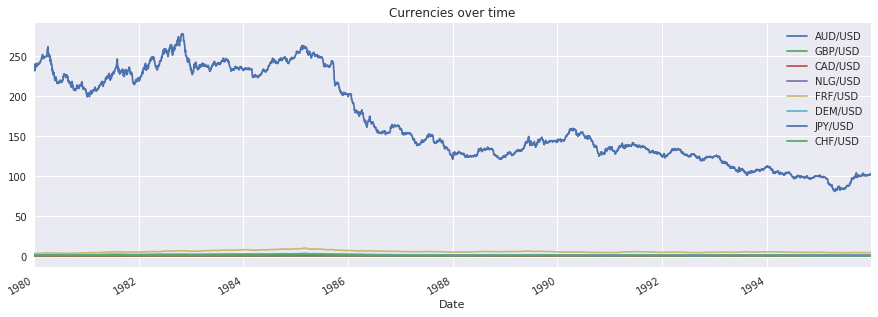

In [42]:
df.plot(x=df["Date"],figsize=(15,5),title="Currencies over time")
plt.savefig("report/Images/Currencies.eps", dpi = 1200)

### Scalling JPY for visualization purposes

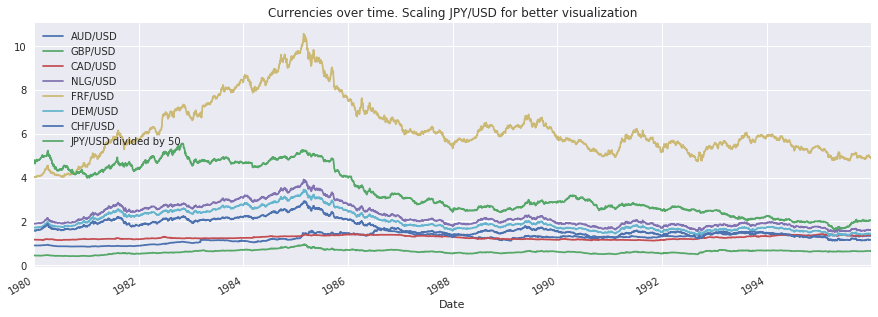

In [43]:
dfScaled = df.drop("JPY/USD",axis = 1)

scalingFactor = 50
dfScaled["JPY/USD divided by " + `scalingFactor`] = df["JPY/USD"]/scalingFactor

dfScaled.plot(x=df["Date"],figsize=(15,5),title="Currencies over time. Scaling JPY/USD for better visualization")
plt.savefig("report/Images/CurrenciesScaling.eps", dpi = 1200)

### Zooming on small periods of time

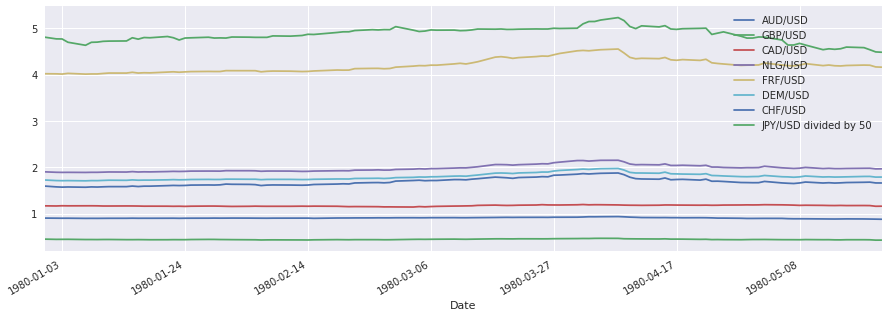

In [44]:
dfReduced = dfScaled
dfReduced = dfReduced.loc[
    (df["Date"] >=  df["Date"][0]  ) 
    &
    (df["Date"] <=  df["Date"][100])
]

dfReduced.plot(x = dfReduced["Date"],figsize=(15,5))

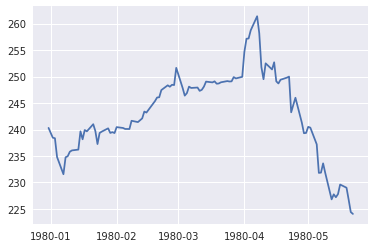

In [45]:
dfReduced = df.loc[
    (df["Date"] >=  df["Date"][0]  ) 
    &
    (df["Date"] <=  df["Date"][100])
]

plt.plot(dfReduced["Date"],dfReduced["JPY/USD"])

In [46]:
#counting Weekdays
print sum(df['Weekday'] == 'Monday')
print sum(df['Weekday'] == 'Tuesday')
print sum(df['Weekday'] == 'Wednesday')
print sum(df['Weekday'] == 'Thursday')
print sum(df['Weekday'] == 'Friday')
print sum(df['Weekday'] == 'Saturday')
print sum(df['Weekday'] == 'Sunday')


741
819
826
810
823
0
0


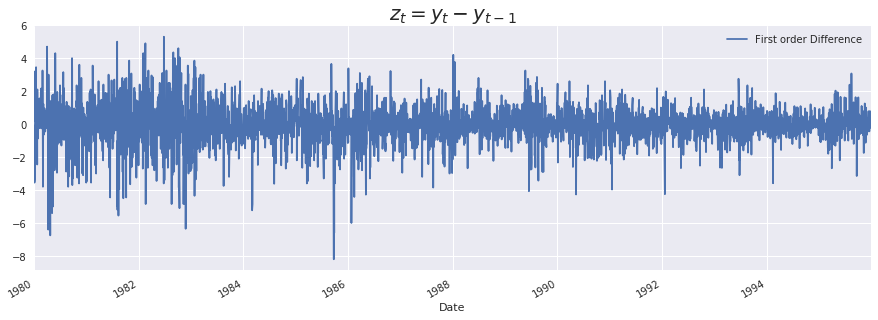

In [47]:
df1stOrdDiff= pd.DataFrame()
df1stOrdDiff["Date"] = df["Date"]
df1stOrdDiff["First order Difference"]   = df["JPY/USD"] -   df["JPY/USD"].shift(1)

df1stOrdDiff.drop("Date",axis = 1).plot(x = df1stOrdDiff["Date"],figsize=(15,5))
plt.title("$z_t = y_t - y_{t-1}$",fontsize=20)
plt.savefig("report/Images/diff.eps", dpi = 1200)

-0.0340930579746
1.33679004728


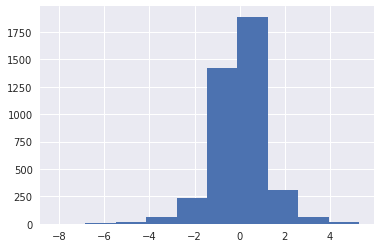

In [48]:
me = df1stOrdDiff["First order Difference"].shift(-1)
me[len(me)-1] = 0
plt.hist(me)
print np.mean(me)
print np.mean(me**2)

### ACF and PACF
(correlation in a more serious way)

/home/gabriel/anaconda3/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


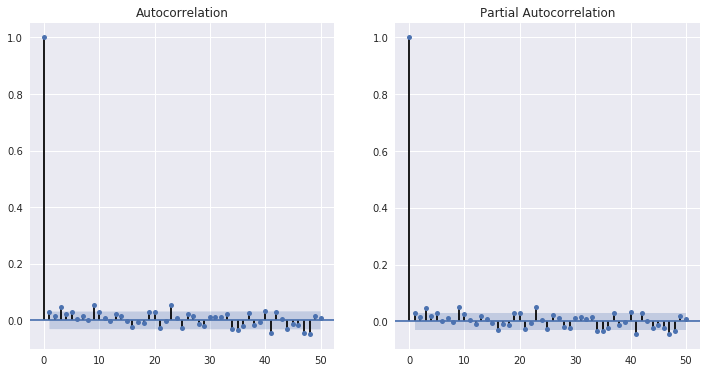

In [49]:
import statsmodels.graphics.tsaplots as sgt
alpha=0.05
lags=50
data =  df1stOrdDiff["First order Difference"][1:]
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')
plt.savefig("report/Images/Correlation2.png", dpi = 700)

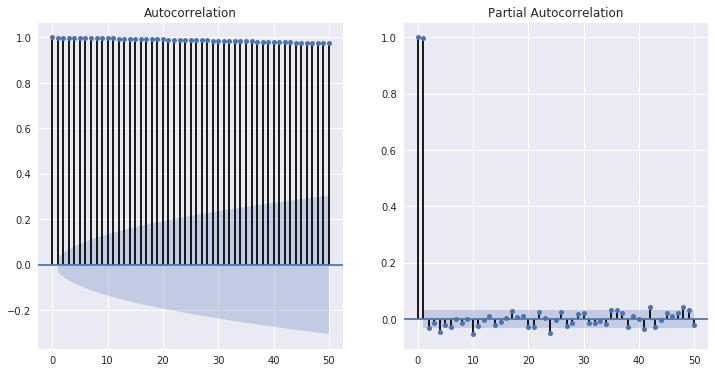

In [50]:
data =  df['JPY/USD']
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig = sgt.plot_acf(data, ax=ax[0], lags=lags, alpha=alpha, unbiased=True)
fig = sgt.plot_pacf(data, ax=ax[1], lags=lags, alpha=alpha, method='ols')
plt.savefig("report/Images/Correlation3TrueNotDiff.png", dpi = 700)

# --------------------------------------------------- Part 1 ------------------------------------------------

# Testing the autocorrelation

As expected the low value of the the durbing coeffifient indicates a positive autocorrelation

In [51]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(df['JPY/USD'])

4.239472062920821e-05

# Linear regression

Fitting
$$
Y = \alpha \times t
+
\beta
$$

In [63]:
dfLinReg = pd.DataFrame()
dfLinReg ["JPY"] = df["JPY/USD"]
dfLinReg["Date"] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

lmfit = smf.ols('JPY~Date', data = dfLinReg).fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JPY   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.838e+04
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:35:54   Log-Likelihood:                -18352.
No. Observations:                4019   AIC:                         3.671e+04
Df Residuals:                    4017   BIC:                         3.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.0952      0.735    347.283      0.000     253.655     256.535
Date          -0.0295      0.000   -135.567      0.000      -0.030      -0.029
==============================================================================
Omnibus:                       58.890   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.484
Skew:                           0.282   Prob(JB):                     1.21e-13
Kurtosis:                       2.805   Cond. No.                     6.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

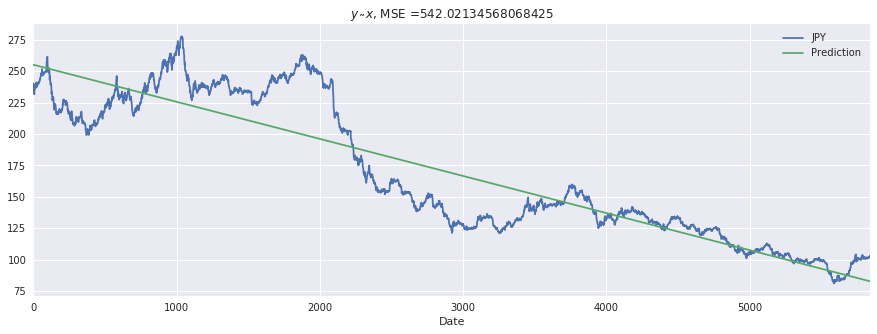

In [64]:
dfLinReg["Prediction"] = lmfit.predict(dfLinReg["Date"])
dfLinReg.drop("Date",axis = 1).plot(x = dfLinReg["Date"],figsize=(15,5))
plt.title("$y\ \~{} \ x$, MSE =" + `lmfit.mse_resid`)
plt.savefig("report/Images/LinReg.eps", dpi = 1200)

### MSE:

In [55]:
print lmfit.mse_resid

542.021345681



Fitting
$$
Y = \alpha_1 \times t
+
\alpha_2 \times (t+\delta)^2
+
\alpha_3 \times (t+\delta)^{\frac{1}{2}}
+
\beta
$$

In [56]:
dfLinRegQuad = pd.DataFrame()
dfLinRegQuad ["JPY"]  = df["JPY/USD"]
dfLinRegQuad ["Date"] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

lmfit = smf.ols('JPY~Date + np.power(Date +1000,.3) + np.sqrt(Date + 500)', data = dfLinRegQuad).fit()
dfLinRegQuad["Prediction"] = lmfit.predict(dfLinRegQuad["Date"])
#dfLinRegQuad.drop("Date",axis = 1).plot(x = dfLinRegQuad["Date"],figsize=(15,5))
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JPY   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     7585.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:32:34   Log-Likelihood:                -17993.
No. Observations:                4019   AIC:                         3.599e+04
Df Residuals:                    4015   BIC:                         3.602e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  6323.0628    226.702     27.892      0.000    5878.602    6767.524
Date                         -0.2266      0.007    -32.135      0.000      -0.240      -0.213
np.power(Date + 1000, .3) -1196.1087     44.414    -26.931      0.000   -1283.185   -1109.032
np.sqrt(Date + 500)         150.7717      5.555     27.140      0.000     139.880     161.663
==============================================================================
Omnibus:                       64.262   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.149
Skew:                           0.316   Prob(JB):                     2.62e-15
Kurtosis:                       2.977   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

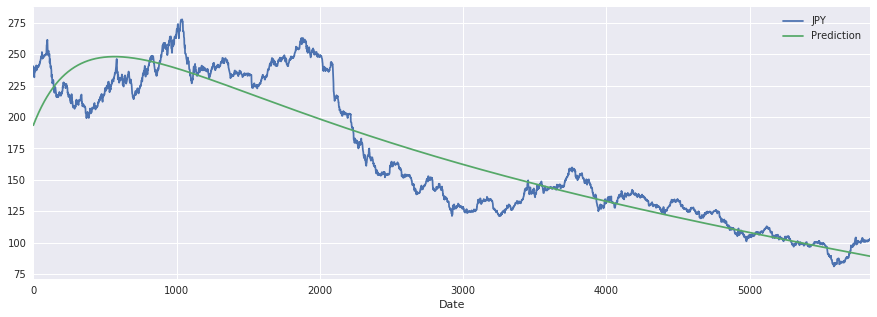

In [57]:
dfLinRegQuad["Prediction"] = lmfit.predict(dfLinRegQuad["Date"])
dfLinRegQuad.drop("Date",axis = 1).plot(x = dfLinRegQuad["Date"],figsize=(15,5))
plt.savefig("report/Images/QuadReg.eps", dpi = 1200)

### MSE:

In [60]:
print lmfit.mse_resid

453.429375018


array([  0.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
         5.84000000e+03,   5.84100000e+03,   5.84200000e+03])

                            OLS Regression Results                            
Dep. Variable:                    JPY   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7427.
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        19:56:50   Log-Likelihood:                -16794.
No. Observations:                4019   AIC:                         3.360e+04
Df Residuals:                    4012   BIC:                         3.365e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             197.4123    

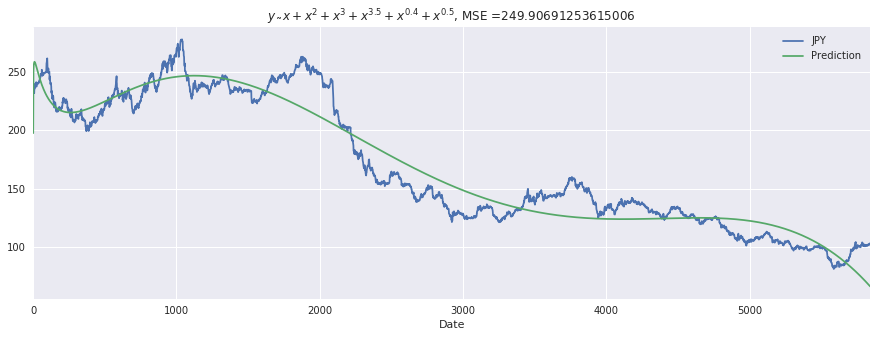

In [123]:
dfLinRegPol = pd.DataFrame()
dfLinRegPol ["JPY"]  = df["JPY/USD"]
dfLinRegPol ["Date"] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

lmfit = smf.ols('JPY~Date + np.power(Date,2) + np.power(Date,3) + np.power(Date,3.5) + np.power(Date,.4) + np.power(Date,.5) ', data = dfLinRegPol).fit()
dfLinRegPol["Prediction"] = lmfit.predict(dfLinRegPol["Date"])
#dfLinRegQuad.drop("Date",axis = 1).plot(x = dfLinRegQuad["Date"],figsize=(15,5))
print lmfit.summary()

dfLinRegPol.drop("Date",axis = 1).plot(x = dfLinRegPol["Date"],figsize=(15,5))
plt.title("$y\ \~{} \ x + x^2 + x^3 + x^{3.5} +x^{0.4} +x^{0.5} $, MSE =" + `lmfit.mse_resid`)
plt.savefig("report/Images/PolReg.eps", dpi = 1200)


# Moving average = Simple averaging - average of last k days

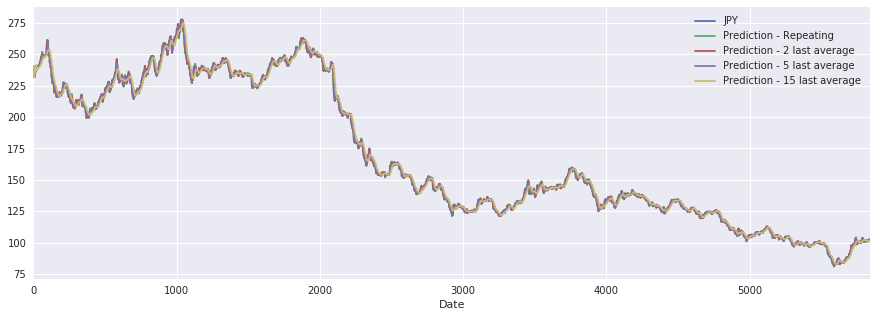

In [16]:
dfRepeatLastDay = pd.DataFrame()
dfRepeatLastDay["JPY"]  = df["JPY/USD"]
dfRepeatLastDay["Date"] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

dfRepeatLastDay["Prediction - Repeating"] = df["JPY/USD"]
for i in range(1,len(df["Date"])):
    dfRepeatLastDay["Prediction - Repeating"][i] = dfRepeatLastDay["JPY"][i-1]

dfRepeatLastDay["Prediction - 2 last average"] = df["JPY/USD"]
for i in range(2,len(df["Date"])):
    dfRepeatLastDay["Prediction - 2 last average"][i] = sum(dfRepeatLastDay["JPY"][i-2:i])/2


dfRepeatLastDay["Prediction - 5 last average"] = df["JPY/USD"]
for i in range(5,len(df["Date"])):
    dfRepeatLastDay["Prediction - 5 last average"][i] = sum(dfRepeatLastDay["JPY"][i-5:i])/5
    
    
dfRepeatLastDay["Prediction - 15 last average"] = df["JPY/USD"]
for i in range(15,len(df["Date"])):
    dfRepeatLastDay["Prediction - 15 last average"][i] = sum(dfRepeatLastDay["JPY"][i-15:i])/15

#dfRepeatLastDay = dfRepeatLastDay.drop([0,1,2,3,4,5,6,7],axis=0)
    
dfRepeatLastDay.drop("Date",axis = 1).plot(x = dfRepeatLastDay["Date"],figsize=(15,5))

plt.savefig("report/Images/MovingAve1.eps", dpi = 1200)

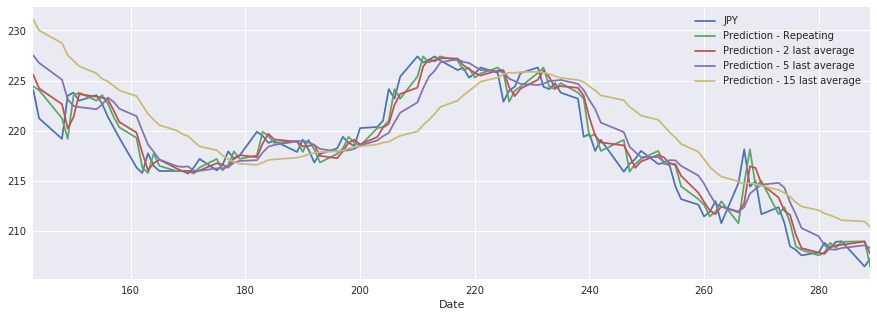

In [17]:
dfReduced = dfRepeatLastDay.loc[
    (dfRepeatLastDay["Date"] >=  dfRepeatLastDay["Date"][100]  ) 
    &
    (dfRepeatLastDay["Date"] <=  dfRepeatLastDay["Date"][200])
]

dfReduced.drop("Date",axis = 1).plot(x = dfReduced["Date"],figsize=(15,5))
plt.savefig("report/Images/MovingAve2.eps", dpi = 1200)

### MSE:

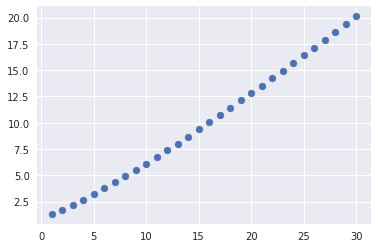

In [139]:
MSE = []
kMax = 30 
for i in range(1,kMax+1):
    pred = []
    for j in range(i,len(df["Date"])):
        pred.append( sum(df["JPY/USD"][j-i:j])/i )
    diff = df["JPY/USD"][i:]- pred
    mse = ((diff**2).mean())
    MSE.append(mse)
    
plt.scatter(range(1,kMax+1),MSE)
plt.savefig("report/Images/MovingAveMSE.eps", dpi = 1200)

In [140]:
MSE

[1.3371227476356489,
 1.7136689009210817,
 2.169971870849928,
 2.670503686176837,
 3.191042116591936,
 3.745504590635978,
 4.313651273221151,
 4.894615512029419,
 5.483719721067684,
 6.092574691194837,
 6.719361232699898,
 7.364377529427649,
 8.018273066140429,
 8.685416228693745,
 9.362933335220337,
 10.051750130370989,
 10.744777411207917,
 11.438435010306048,
 12.132176295290899,
 12.829664112465682,
 13.535699670867196,
 14.244882653622456,
 14.956703007639039,
 15.675831875478035,
 16.4031701828343,
 17.134733153729073,
 17.8722273910647,
 18.61642526005582,
 19.36332712148979,
 20.113228200523654]

# Exponential Smothing

## Exponentially Weighted Moving Average
### No trend

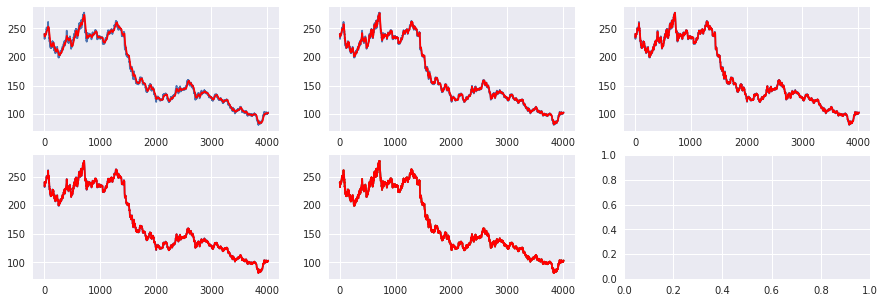

In [14]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
al = 0.1;
ewmaPoint1 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,0].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[0,0].plot(range(0,df.shape[0]), ewmaPoint1.mean(), color='red')

al = 0.3;
ewmaPoint3 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,1].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[0,1].plot(range(0,df.shape[0]), ewmaPoint3.mean(), color='red')

al = 0.5;
ewmaPoint5 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[0,2].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[0,2].plot(range(0,df.shape[0]), ewmaPoint5.mean(), color='red')

al = 0.7;
ewmaPoint7 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,0].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[1,0].plot(range(0,df.shape[0]), ewmaPoint7.mean(), color='red')

al = .9;
ewmaPoint9 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,1].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[1,1].plot(range(0,df.shape[0]), ewmaPoint9.mean(), color='red')

al = .9999;
ewmaPoint9999 = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
ax[1,1].plot(range(0,df.shape[0]), df['JPY/USD'])
ax[1,1].plot(range(0,df.shape[0]), ewmaPoint9999.mean(), color='red')

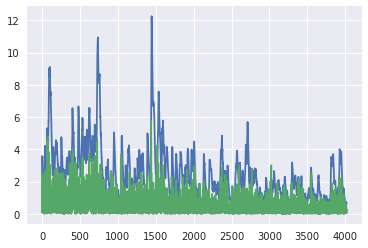

In [15]:
plt.plot(range(0,df.shape[0]),ewmaPoint1.std())
plt.plot(range(0,df.shape[0]),ewmaPoint9999.std())

### Selecting the Smoothing Parameters¶

1.0
1.33712274764


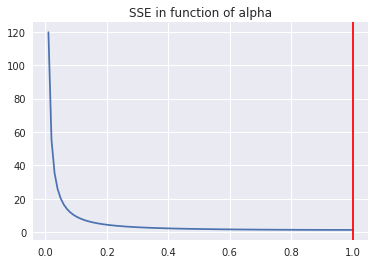

In [136]:
alpha = np.linspace(0.01,1,num=100)
err = [];
# given a series and alpha, return series of smoothed points
for al in alpha:
    ewma = df['JPY/USD'].ewm(alpha=al, min_periods=0, freq=None)
    pred = ewma.mean();
    #Computing square error:
    diff = df['JPY/USD'] - pred.shift(1);
    err.append(((diff ** 2).mean()))
    
plt.plot(alpha, err)
plt.title("SSE in function of alpha")
optal = alpha[np.argmin(err)]
plt.axvline(x=optal, color='red')
plt.savefig("report/Images/ewma.eps", dpi = 1200)
print(optal)
print min(err)

## Holt's Trend Corrected Smoothing

In [17]:
def double_exponential_smoothing(series, alpha, gamma, L0, B0):
    L = []
    B = []
    for n in range(0, len(series)):
        y = series[n]
        if n==0:
            Ln = alpha*y + (1-alpha)*(L0+B0);
            Bn = gamma*(Ln-L0) + (1-gamma)*B0;
        else:
            Ln = alpha*y + (1-alpha)*(L[n-1]+Bn)
            Bn = gamma*(Ln-L[n-1]) + (1-gamma)*Bn
        L.append(Ln)
        B.append(Bn)
    return {'Ln':L,'Bn':B}
# return the records of Ln, Bn and SNn at every instant
# To use the return of this function, Y(n+1)=Ln+Bn for future prediction

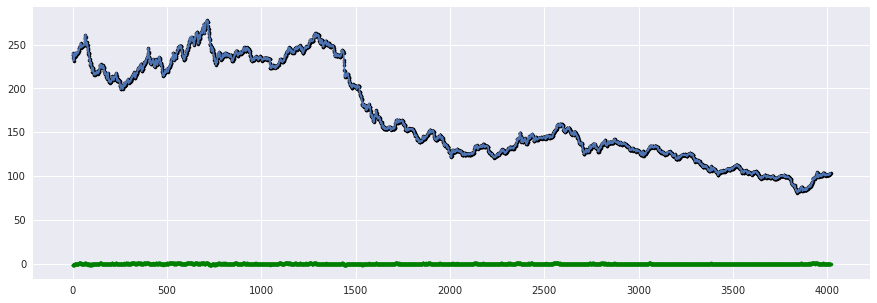

In [43]:
a = 0.9;
b = 0.1;
series = df['JPY/USD'].values
holt = double_exponential_smoothing(series, a, b, series[0], series[1]-series[0])
fig = plt.figure(figsize=(15,5))
plt.plot(range(0,df.shape[0]), df['JPY/USD'])
plt.scatter(x=range(0,df.shape[0]), y=holt['Ln'], color='black',s = 10)
plt.scatter(x=range(0,df.shape[0]), y=holt['Bn'], color='green',s = 10)

### Selecting the Smoothing Parameters¶

In [153]:
alpha = np.linspace(0.001,1,num=101)
gamma = np.linspace(0.001,1,num=101)

# ta errado...
errMin = 10000;
optal = [1,3]
# given a series and alpha, return series of smoothed points
for al in alpha:
    #print al
    for gam in gamma:
        holt = double_exponential_smoothing(series, a, b, series[0], series[1]-series[0])
        pred = pd.DataFrame()
        pred['JPY/USD'] = holt["Ln"] + holt["Bn"];
        
        #Computing square error:
        diff = df['JPY/USD'] - pred['JPY/USD'].shift(1);
        error = (diff ** 2).mean();
        if error < errMin:
            errMin = error
            optal = [al,gam]
            print optal

print(optal)

NameError: name 'double_exponential_smoothing' is not defined

# Arma

### First order difference

### Variance and mean over time
the variance and mean don't change much (it is aroun 4 then 2 then 1...) -> arma might work 

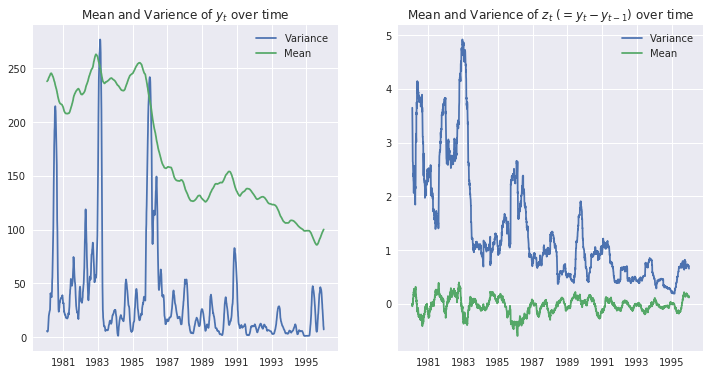

In [156]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

n = 100
variance = []
average = []
for i in range(20,len(df['Date'])):
    variance.append(np.var(df1stOrdDiff['First order Difference'][max(i-n,0):i]))
    average.append(np.mean(df1stOrdDiff['First order Difference'][max(i-n,0):i]))

ax[1].plot(df['Date'][20:len(df['Date'])],variance) #blue
ax[1].plot(df['Date'][20:len(df['Date'])],average)  #green
ax[1].legend(["Variance","Mean"])
ax[1].set_title("Mean and Varience of $z_t$ ($= y_t - y_{t-1}$) over time")


variance = []
average = []
for i in range(20,len(df['Date'])):
    variance.append(np.var(df["JPY/USD"][max(i-n,0):i]))
    average.append(np.mean(df["JPY/USD"][max(i-n,0):i]))

ax[0].plot(df['Date'][20:len(df['Date'])],variance) #blue
ax[0].plot(df['Date'][20:len(df['Date'])],average)  #green
ax[0].legend(["Variance","Mean"])
ax[0].set_title("Mean and Varience of $ y_t $ over time")

fig.savefig("report/Images/MeanAndVar.eps", dpi = 1200)

4.23947206292e-05
1.93546137193
2.98300236321


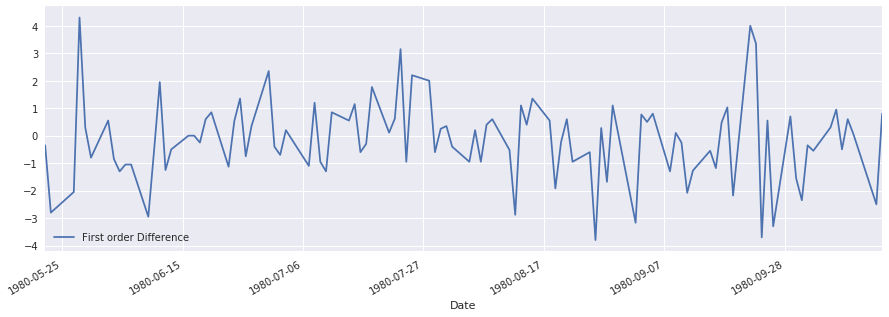

In [31]:
dfReduced = df1stOrdDiff
dfReduced = dfReduced.loc[
    (dfReduced["Date"] >=  dfReduced["Date"][100]  ) 
    &
    (dfReduced["Date"] <=  dfReduced["Date"][200])
]

dfReduced.drop("Date",axis = 1).plot(x = dfReduced["Date"],figsize=(15,5))
print durbin_watson(df['JPY/USD'])
print durbin_watson(df1stOrdDiff['First order Difference'][1:])
print durbin_watson(df2ndOrdDiff['Second order Difference'][2:])

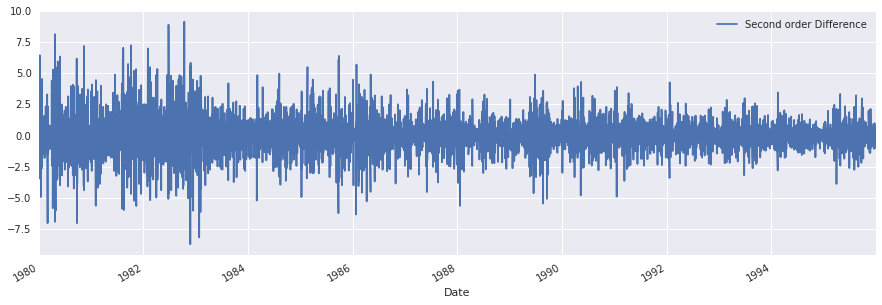

In [22]:
df2ndOrdDiff = pd.DataFrame()
df2ndOrdDiff["Date"] = df["Date"]
df2ndOrdDiff["Second order Difference"]  = df["JPY/USD"] - 2*df["JPY/USD"].shift(1) + df["JPY/USD"].shift(2)
df2ndOrdDiff.drop("Date",axis = 1).plot(x = df1stOrdDiff["Date"],figsize=(15,5))

## Autocorrelation

### Plotting shift
no visible correlation!
normal distributed ?

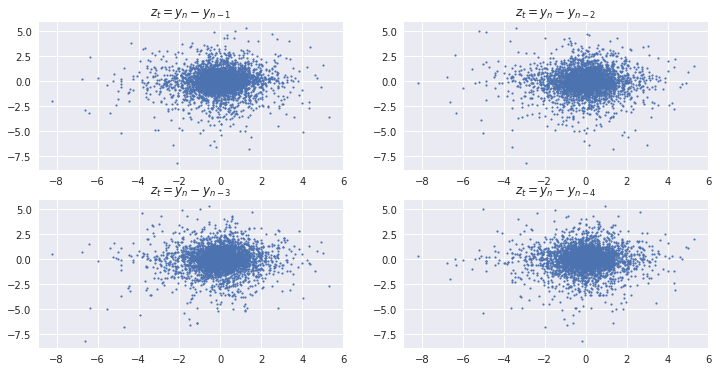

In [32]:
fig, ax = plt.subplots(2,2,figsize=(12,6))

a = [[1,2],[3,4]]

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].scatter(x = df1stOrdDiff["First order Difference"], y = df1stOrdDiff["First order Difference"].shift(a[i][j]),s = 3)
        ax[i,j].set_title("$z_t = y_n - y_{n-"+`a[i][j]` +"}$")
plt.savefig("report/Images/Correlation1.eps", dpi = 1200)

# Evaluation

# --------------------------------------------------- Part 2 ------------------------------------------------